<a href="https://colab.research.google.com/github/mohmaed7777/DecisionTress-for-Brain-Strokes-Predictions/blob/main/Decision_Trees_classifier_to_predict_Brain_Strokes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Attribute Information:**



According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.
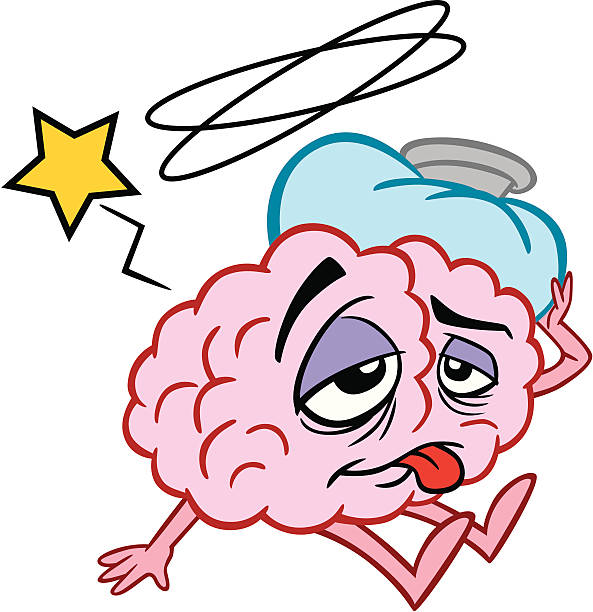


1) **gender**: 
"Male", "Female" or "Other"

2) **age**: age of the patient

3) **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

4) **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

5) **ever_married**: "No" or "Yes"

6) **work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

7)**Residence_type**: "Rural" or "Urban"

8) **avg_glucose_level**: average glucose level in blood

9) **bmi**: body mass index

10) **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*

11) **stroke**: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn  as sns 
import sklearn 
%matplotlib inline 
sns.set()
pd.plotting.register_matplotlib_converters()
print('Setup Complete!')

Setup Complete!


In [ ]:
data_path = '/content/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(data_path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**EDA and preprocessing:**

In [ ]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
df.dtypes.value_counts()

object     5
int64      4
float64    3
dtype: int64

In [ ]:
# Check if the data are all scaled with -1 for minmum values and +1 for maximum values: 
df.iloc[:, :-1].min().value_counts()

0           2
No          1
Govt_job    1
Unknown     1
10.3        1
Rural       1
55.12       1
67          1
Female      1
0.08        1
dtype: int64

In [ ]:
df.iloc[:, :-1].max().value_counts()

1           2
271.74      1
Urban       1
72940       1
children    1
Yes         1
97.6        1
smokes      1
Other       1
82.0        1
dtype: int64

In [ ]:
# Dropout any column that at least has one missing value
df.drop(['id', 'bmi'], axis=1, inplace=True)

In [ ]:
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


**Encode the categorical variables:**

In [ ]:
df_uniques = df.nunique()
df_uniques

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
binary_vals = list(df_uniques[df_uniques == 2].index)
binary_vals

['hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'stroke']

In [ ]:
df[binary_vals].dtypes

hypertension       int64
heart_disease      int64
ever_married      object
Residence_type    object
stroke             int64
dtype: object

In [ ]:
categorical_vals  = list(df_uniques[(df_uniques > 2) & (df_uniques <=6)].index)
categorical_vals

['gender', 'work_type', 'smoking_status']

In [ ]:
[[i, list(df[i].unique())] for i in categorical_vals]

[['gender', ['Male', 'Female', 'Other']],
 ['work_type',
  ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']],
 ['smoking_status', ['formerly smoked', 'never smoked', 'smokes', 'Unknown']]]

In [ ]:
numaric_vals = list(set(df.columns) - set(categorical_vals)- set(binary_vals))
numaric_vals

['age', 'avg_glucose_level']

**Encoding process:**

In [ ]:

from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder

In [ ]:
lb, le, lo = LabelBinarizer(), LabelEncoder(), OrdinalEncoder()

In [ ]:
for col in categorical_vals: 
  df[col] = le.fit_transform(df[col])

In [ ]:
for col in binary_vals:
  df[col] = lb.fit_transform(df[col])

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,1,1
1,0,61.0,0,0,1,3,0,202.21,2,1
2,1,80.0,0,1,1,2,0,105.92,2,1
3,0,49.0,0,0,1,2,1,171.23,3,1
4,0,79.0,1,0,1,3,0,174.12,2,1


In [ ]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
gender,5110.0,0.41,0.49,0.00,0.00,0.00,1.00,2.00
age,5110.0,43.23,22.61,0.08,25.00,45.00,61.00,82.00
hypertension,5110.0,0.10,0.30,0.00,0.00,0.00,0.00,1.00
heart_disease,5110.0,0.05,0.23,0.00,0.00,0.00,0.00,1.00
ever_married,5110.0,0.66,0.48,0.00,0.00,1.00,1.00,1.00
work_type,5110.0,2.17,1.09,0.00,2.00,2.00,3.00,4.00
Residence_type,5110.0,0.51,0.50,0.00,0.00,1.00,1.00,1.00
avg_glucose_level,5110.0,106.15,45.28,55.12,77.24,91.88,114.09,271.74
smoking_status,5110.0,1.38,1.07,0.00,0.00,2.00,2.00,3.00
stroke,5110.0,0.05,0.22,0.00,0.00,0.00,0.00,1.00


**Train Test Split:**

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=1000, random_state=42)

In [ ]:
# Get the index values from the genetor: 
train_index , test_index = next(strat_shuff_split.split(df[feature_col], df['stroke']))

In [ ]:
# Create the datasets : 
x_train = df.loc[train_index, feature_col]
y_train = df.loc[train_index, 'stroke']
x_test = df.loc[test_index, feature_col]
y_test = df.loc[test_index, 'stroke']

In [ ]:
# Checking the perentage compistion of each level in the train and test sets: 
y_train.value_counts(normalize=True).sort_index()

0    0.951338
1    0.048662
Name: stroke, dtype: float64

In [ ]:
y_test.value_counts(normalize=True).sort_index()

0    0.951
1    0.049
Name: stroke, dtype: float64

In [ ]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,3.000000,1.000000


**1/Applying KNN algorithm:-**

In [ ]:
# Estimate Knn model and report the outcome : 
from sklearn.neighbors import KNeighborsClassifier

In [ ]:

knn = KNeighborsClassifier(n_neighbors=13)


In [ ]:
# Train the model :
knn = knn.fit(x_train, y_train)

In [ ]:
y_pred = knn.predict(x_test)
y_pred[:5]

array([0, 0, 0, 0, 0])

**Model Validation and Accuracy:**

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.049

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.951